# Task 1

Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset.

small decision tree.

deep decision tree.

random forest on small trees.

random forest on deep trees.

Calculate the following metrics to check the quality of your models:


precision;

recall;

accuracy;

F1-score;

log-loss;

Plot precision-recall and ROC curves for your models.

Train a classifier who avoids Type II (False Negative) errors and calculate 
metrics from p.2 for it.

In [71]:
#Importing required libraries

import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_recall_curve, f1_score, log_loss, precision_score, recall_score, plot_roc_curve, plot_precision_recall_curve, roc_curve, precision_recall_curve, auc, make_scorer
from sklearn.model_selection import  learning_curve
from sklearn.ensemble import RandomForestClassifier

In [72]:
#loading data from google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [73]:
# load the bioresponse data as data
data=pd.read_csv("/content/drive/My Drive/colab data/bioresponse.csv")
data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.000000,0.00,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.000000,0.00,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.000000,0.00,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.000000,0.00,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,0.000000,0.0000,0.000000,0.071800,0.362006,0.229374,0.603893,0.129706,0.092400,0.036100,0.00473,0.069000,1,0.00,0.486439,0.783710,1,1,0.000000,0.364694,0.136861,0.047300,0.100295,0.00000,0.000000,0.000000,0.00,0.223324,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,0.085200,0.2500,0.064500,0.121309,0.347521,0.250846,0.660747,0.221975,0.167944,0.065700,0.00939,0.172414,1,0.00,0.390864,0.815279,0,1,0.000000,0.153533,0.127563,0.122141,0.104815,0.08000,0.191429,0.146735,0.00,0.101137,0.075100,...,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,0.624027,0.1875,0.064500,0.091700,0.519094,0.243037,0.691896,0.215831,0.338637,0.290643,0.04450,0.103448,1,0.00,0.590995,0.581372,0,0,0.333333,0.128839,0.357203,0.077600,0.028500,0.06200,0.308468,0.166667,0.00,0.019900,0.377263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,0.37293

In [74]:
df_log_reg=data.iloc[:, 1:]
y=data[['Activity']]

In [75]:
scaler = StandardScaler()
X=scaler.fit_transform(df_log_reg)

In [76]:
#Data is divided for training and testing, here 80% of data is used for training and 20% is used for testing the accurecy.
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2 , random_state=24 )

In [77]:
#training the data using decision trees and random forests.
# For small decision tree
small_dt=DecisionTreeClassifier(max_depth=2, random_state=24)
small_dt.fit(X_train, y_train.values.ravel())
y_out=small_dt.predict(X_test)
y_out_proba1 = small_dt.predict_proba(X_test)
print('Small decision tree')
print('Precision is', precision_score(y_test, y_out))
print('Recall is ', recall_score(y_test, y_out))
print('Accuracy is ', accuracy_score(y_test, y_out))
print('F1 score is ', f1_score(y_test, y_out))
print('Log loss is ', log_loss(y_test, y_out))
roc1=roc_auc_score(y_test, y_out)
print('roc_auc is ', roc1 )
y_out_proba1

Small decision tree
Precision is 0.7348643006263048
Recall is  0.8321513002364066
Accuracy is  0.7363515312916112
F1 score is  0.7804878048780487
Log loss is  9.106230725786885
roc_auc is  0.7224780891425935


array([[0.78817299, 0.21182701],
       [0.19644181, 0.80355819],
       [0.19644181, 0.80355819],
       ...,
       [0.78817299, 0.21182701],
       [0.19644181, 0.80355819],
       [0.19644181, 0.80355819]])

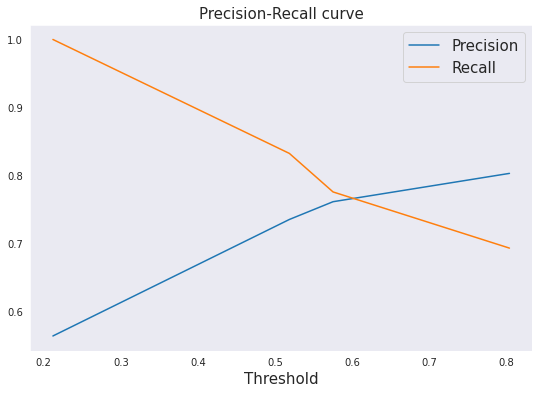

In [78]:
prec, rec, thresh = precision_recall_curve(y_test, y_out_proba1[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

In [79]:
#training the data using decision trees and random forests.
# For deep decision tree
deep_dt=DecisionTreeClassifier(max_depth=20, random_state=24)
deep_dt.fit(X_train, y_train.values.ravel())
y_out=deep_dt.predict(X_test)
y_out_proba2 = deep_dt.predict_proba(X_test)
print('deep decision tree')
print('Precision is', precision_score(y_test, y_out))
print('Recall is ', recall_score(y_test, y_out))
print('Accuracy is ', accuracy_score(y_test, y_out))
print('F1 score is ', f1_score(y_test, y_out))
print('Log loss is ', log_loss(y_test, y_out))
roc2=roc_auc_score(y_test, y_out)
print('roc_auc is ', roc2 )
y_out_proba2

deep decision tree
Precision is 0.7403189066059226
Recall is  0.7683215130023641
Accuracy is  0.7177097203728362
F1 score is  0.7540603248259862
Log loss is  9.750082223472846
roc_auc is  0.710380268696304


array([[0.90873016, 0.09126984],
       [0.05882353, 0.94117647],
       [0.        , 1.        ],
       ...,
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.11811024, 0.88188976]])

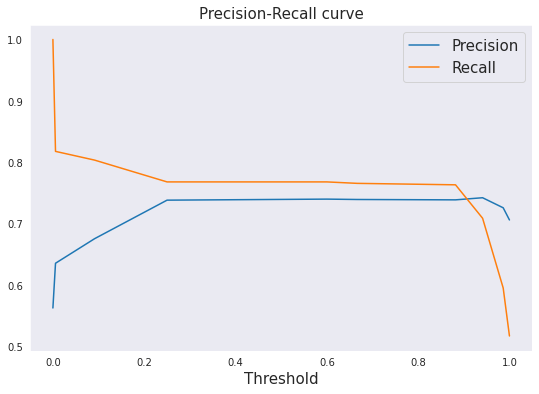

In [80]:
prec, rec, thresh = precision_recall_curve(y_test, y_out_proba2[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

In [81]:
#training the data using decision trees and random forests.
# for Random forest with small tree
small_rf=RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 24)
small_rf.fit(X_train, y_train.values.ravel())
y_out=small_rf.predict(X_test)
y_out_proba3 = small_rf.predict_proba(X_test)
print('Random forest with small dicision tree')
print('Precision is', precision_score(y_test, y_out))
print('Recall is ', recall_score(y_test, y_out))
print('Accuracy is ', accuracy_score(y_test, y_out))
print('F1 score is ', f1_score(y_test, y_out))
print('Log loss is ', log_loss(y_test, y_out))
roc3=roc_auc_score(y_test, y_out)
print('roc_auc is ', roc3 )
y_out_proba3

Random forest with small dicision tree
Precision is 0.712742980561555
Recall is  0.7801418439716312
Accuracy is  0.6990679094540613
F1 score is  0.744920993227991
Log loss is  10.393967791888189
roc_auc is  0.6873270195467911


array([[0.55038958, 0.44961042],
       [0.40860815, 0.59139185],
       [0.3764515 , 0.6235485 ],
       ...,
       [0.59747883, 0.40252117],
       [0.40461729, 0.59538271],
       [0.42052317, 0.57947683]])

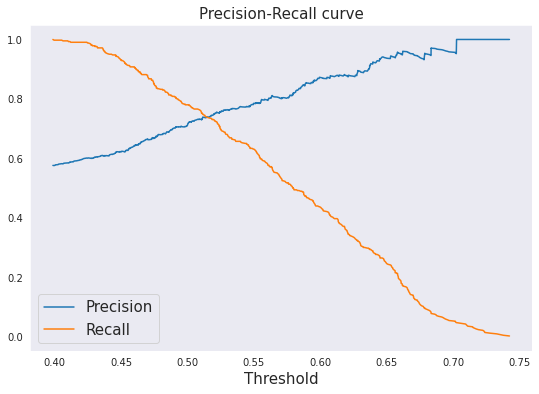

In [82]:
prec, rec, thresh = precision_recall_curve(y_test, y_out_proba3[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

In [83]:
#training the data using decision trees and random forests.
# For deep decision tree
deep_rf=RandomForestClassifier(n_estimators = 50, max_depth = 20, random_state = 24)
deep_rf.fit(X_train, y_train.values.ravel())
y_out=deep_rf.predict(X_test)
y_out_proba4 = deep_rf.predict_proba(X_test)
print('random forest with deep decision tree')
print('Precision is', precision_score(y_test, y_out))
print('Recall is ', recall_score(y_test, y_out))
print('Accuracy is ', accuracy_score(y_test, y_out))
print('F1 score is ', f1_score(y_test, y_out))
print('Log loss is ', log_loss(y_test, y_out))
roc4=roc_auc_score(y_test, y_out)
print('roc_auc is ', roc4 )
y_out_proba4

random forest with deep decision tree
Precision is 0.8097447795823666
Recall is  0.8250591016548463
Accuracy is  0.7922769640479361
F1 score is  0.8173302107728337
Log loss is  7.174586797064371
roc_auc is  0.7875295508274232


array([[0.89444215, 0.10555785],
       [0.19969278, 0.80030722],
       [0.235     , 0.765     ],
       ...,
       [0.89077473, 0.10922527],
       [0.22      , 0.78      ],
       [0.58      , 0.42      ]])

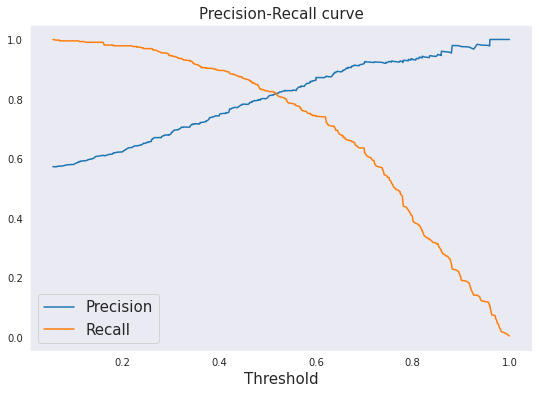

In [84]:
prec, rec, thresh = precision_recall_curve(y_test, y_out_proba4[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

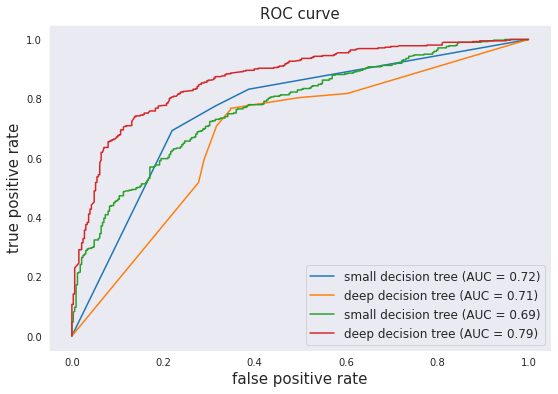

In [85]:
# ROC-curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr1, tpr1, thr1 = roc_curve(y_test, y_out_proba1[:,1])
fpr2, tpr2, thr2 = roc_curve(y_test, y_out_proba2[:,1])
fpr3, tpr3, thr3 = roc_curve(y_test, y_out_proba3[:,1])
fpr4, tpr4, thr4 = roc_curve(y_test, y_out_proba4[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr1, tpr1, label='small decision tree (AUC = ' + str(round(roc1,2))+')')
plt.plot(fpr2, tpr2, label='deep decision tree (AUC = ' + str(round(roc2,2))+')')
plt.plot(fpr3, tpr3, label='small decision tree (AUC = ' + str(round(roc3,2))+')')
plt.plot(fpr4, tpr4, label='deep decision tree (AUC = ' + str(round(roc4,2))+')')

plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 12)

In [86]:
# Training a random forest classifier
clf = RandomForestClassifier(n_jobs=-1, random_state=1)
clf.fit(X_train, y_train.values.ravel())
y_scores=clf.predict_proba(X_test)[:, 1]
p, r, thresholds = precision_recall_curve(y_test, y_scores)

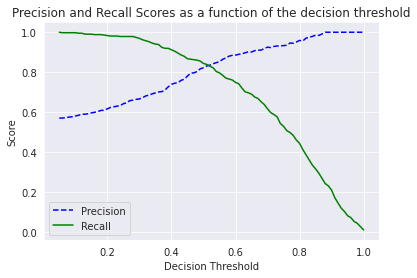

In [87]:
# plotting the recall presision score with respect to decision threshold to find the threshold where the recall is maximum.
plt.title("Precision and Recall Scores as a function of the decision threshold")
plt.plot(thresholds, p[:-1], "b--", label="Precision")
plt.plot(thresholds, r[:-1], "g-", label="Recall")
plt.ylabel("Score")
plt.xlabel("Decision Threshold")
plt.legend(loc='best')

In [149]:
# Function which changes the predicted classes by adjusting the decision threshold 
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]
t=0.05
y_pred_adj = adjusted_classes(y_scores, t)
print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))

     pred_neg  pred_pos
neg        10       318
pos         0       423


In [150]:
print('Random forest classifier with zero Type 2 error')
print('Precision is', precision_score(y_test, y_pred_adj))
print('Recall is ', recall_score(y_test, y_pred_adj))
print('Accuracy is ', accuracy_score(y_test, y_pred_adj))
print('F1 score is ', f1_score(y_test, y_pred_adj))
print('Log loss is ', log_loss(y_test, y_pred_adj))
roc=roc_auc_score(y_test, y_pred_adj)
print('roc_auc is ', roc )

Random forest classifier with zero Type 2 error
Precision is 0.5708502024291497
Recall is  1.0
Accuracy is  0.5765645805592543
F1 score is  0.7268041237113402
Log loss is  14.625279847622368
roc_auc is  0.5152439024390244


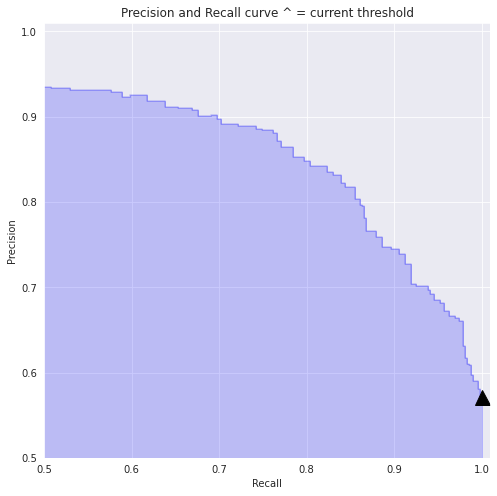

In [151]:
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)